<a href="https://colab.research.google.com/github/Mund99/DSUB_5.0/blob/main/Day_18_Social_Ads_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Ads Forecasting Using Linear Regression


---
**The Business Question** 

---

Given a budget of $100k, how would you utilize the budget on the social media advertising to gain the most effective return. 


In [1]:
# Import Libraries 
import pandas as pd 
import seaborn as sns 

## Obtain Data

In [24]:
df = pd.read_excel("https://github.com/Mund99/DSUB_5.0/blob/main/Dataset/social-ads-raw.xlsx?raw=true")
df.head(10)

,segment,google,facebook,instagram,sales,size,area
0,1,230.1,37.8,69.2,22.1,large,rural
1,2,44.5,39.3,45.1,10.4,small,urban
2,3,17.2,45.9,69.3,9.3,small,rural
3,4,151.5,41.3,58.5,18.5,small,urban
4,5,180.8,10.8,58.4,12.9,large,suburban
5,6,8.7,48.9,75.0,7.2,large,suburban
6,7,57.5,32.8,23.5,11.8,large,suburban
7,8,120.2,19.6,11.6,13.2,large,urban
8,9,8.6,2.1,1.0,4.8,large,rural
9,10,199.8,2.6,21.2,10.6,large,suburban


## Scrub Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   segment    200 non-null    int64  
 1   google     200 non-null    float64
 2   facebook   200 non-null    float64
 3   instagram  200 non-null    float64
 4   sales      200 non-null    float64
 5   size       200 non-null    object 
 6   area       200 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 11.1+ KB


In [4]:
# Check the unique items in the data features
print('Unique items in size data feature: ', df['size'].unique())
print('Unique items in area data feature: ', df['area'].unique())

Unique items in size data feature:  ['large' 'small']
Unique items in area data feature:  ['rural' 'urban' 'suburban']


In [5]:
# Market data feature 
df['size_large'] = df['size'].map({'small':0, 'large':1})
df['size_large'].unique()

array([1, 0])

In [6]:
# Area data feature
area_dummies = pd.get_dummies(df['area'])
df = df.join(area_dummies)

In [7]:
df.head(10)

,segment,google,facebook,instagram,sales,size,area,size_large,rural,suburban,urban
0,1,230.1,37.8,69.2,22.1,large,rural,1,1,0,0
1,2,44.5,39.3,45.1,10.4,small,urban,0,0,0,1
2,3,17.2,45.9,69.3,9.3,small,rural,0,1,0,0
3,4,151.5,41.3,58.5,18.5,small,urban,0,0,0,1
4,5,180.8,10.8,58.4,12.9,large,suburban,1,0,1,0
5,6,8.7,48.9,75.0,7.2,large,suburban,1,0,1,0
6,7,57.5,32.8,23.5,11.8,large,suburban,1,0,1,0
7,8,120.2,19.6,11.6,13.2,large,urban,1,0,0,1
8,9,8.6,2.1,1.0,4.8,large,rural,1,1,0,0
9,10,199.8,2.6,21.2,10.6,large,suburban,1,0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   segment     200 non-null    int64  
 1   google      200 non-null    float64
 2   facebook    200 non-null    float64
 3   instagram   200 non-null    float64
 4   sales       200 non-null    float64
 5   size        200 non-null    object 
 6   area        200 non-null    object 
 7   size_large  200 non-null    int64  
 8   rural       200 non-null    uint8  
 9   suburban    200 non-null    uint8  
 10  urban       200 non-null    uint8  
dtypes: float64(4), int64(2), object(2), uint8(3)
memory usage: 13.2+ KB


## Explore Data 

In [9]:
# Display the descriptive summary
df.describe() 

,segment,google,facebook,instagram,sales,size_large,rural,suburban,urban
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500,0.540000,0.295000,0.390000,0.315000
std,57.879185,85.854236,14.846809,21.778621,5.217457,0.499648,0.457187,0.488974,0.465682
min,1.000000,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000,0.000000,0.000000
25%,50.750000,74.375000,9.975000,12.750000,10.375000,0.000000,0.000000,0.000000,0.000000
50%,100.500000,149.750000,22.900000,25.750000,12.900000,1.000000,0.000000,0.000000,0.000000
75%,150.250000,218.825000,36.525000,45.100000,17.400000,1.000000,1.000000,1.000000,1.000000
max,200.000000,296.400000,49.600000,114.000000,27.000000,1.000000,1.000000,1.000000,1.000000


- The mean and median ofthe three social media platform shows that Google has the most the most allocated budget. 
- The instagram contains outlier as the 75% and the max is quite large apart. 

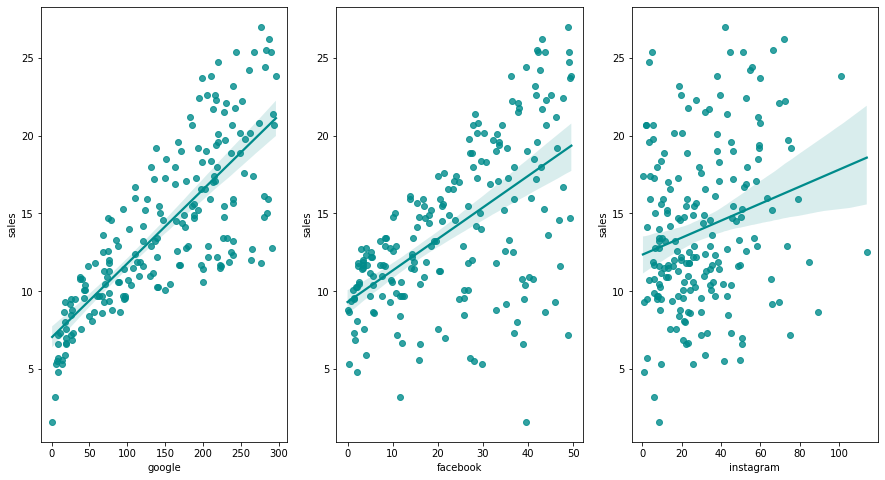

In [10]:
import matplotlib.pyplot as plt 
fig, subs = plt.subplots(1,3, figsize=(15,8))

sns.regplot(data=df, x='google', y='sales', color='darkcyan', ax=subs[0])
sns.regplot(data=df, x='facebook', y='sales', color='darkcyan', ax=subs[1])
sns.regplot(data=df, x='instagram', y='sales', color='darkcyan', ax=subs[2])

- The plot shows that Google has the most linearity with the sales. The prediction output for Google would be much easier and more accurate. 
- Instagram shows the most scattered and random plot among the three social media platform. The prediction sales output mathematically would be hard. 

In [11]:
# Correlation 
corr = df.corr()
corr

,segment,google,facebook,instagram,sales,size_large,rural,suburban,urban
segment,1.000000,0.017715,-0.110680,-0.154944,-0.051616,-0.110514,-0.035417,0.006747,0.027686
google,0.017715,1.000000,0.054809,0.056648,0.782224,0.131097,0.028420,-0.004299,-0.023388
facebook,-0.110680,0.054809,1.000000,0.354104,0.576223,-0.078994,-0.006793,-0.068522,0.078618
instagram,-0.154944,0.056648,0.354104,1.000000,0.228299,0.016979,0.037001,-0.046722,0.012733
sales,-0.051616,0.782224,0.576223,0.228299,1.000000,0.061626,0.013425,-0.062942,0.052911
size_large,-0.110514,0.131097,-0.078994,0.016979,0.061626,1.000000,0.157068,-0.043605,-0.108417
rural,-0.035417,0.028420,-0.006793,0.037001,0.013425,0.157068,1.000000,-0.517230,-0.438658
suburban,0.006747,-0.004299,-0.068522,-0.046722,-0.062942,-0.043605,-0.517230,1.000000,-0.542222
urban,0.027686,-0.023388,0.078618,0.012733,0.052911,-0.108417,-0.438658,-0.542222,1.000000


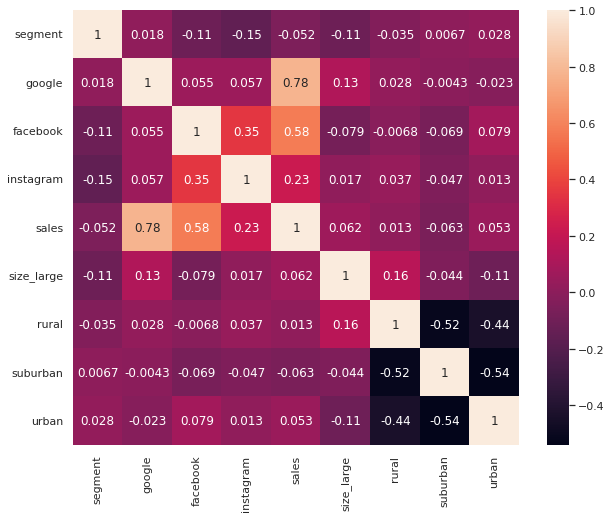

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr, annot = True)

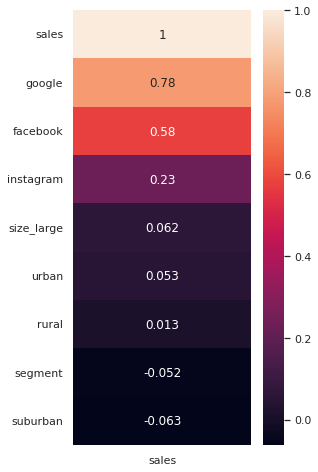

In [13]:
sns.set(rc={'figure.figsize':(4,8)})
sales_corr = df.corr()[['sales']].sort_values(by='sales', ascending=False)
sns.heatmap(sales_corr, annot = True)

**The target variable - Sales** 
- Social media: Google has the highest correlation, followed by Facebook then Instagram. 
- Size: Large size do bring positive correlation to the sales 
- Area: Urban area is the most correlated 


## Model Data

In [14]:
columns = ['google', 'facebook', 'instagram']
X = df[columns].values    # features 
y = df['sales']           # target 

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

score = model.score(X,y)
intercept = model.intercept_ 
coef = model.coef_ 

print('R-square Score:', score)
print('Intercept:', intercept)
print('Coefficients:', coef)

R-square Score: 0.8972106381789522
Intercept: 2.938889369459412
Coefficients: [ 0.04576465  0.18853002 -0.00103749]


- The coefficient means for every 1000 dollar spent on Google will contribute to 45 units sold, on Facebook will contribute to 188 units sold, and Instagram means doesn't show linearity to the sales.

In [16]:
columns = ['google', 'facebook', 'instagram', 'size_large', 'rural', 'urban', 'suburban']
X = df[columns].values    # features 
y = df['sales']           # target 

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

score = model.score(X,y)
intercept = model.intercept_ 
coef = model.coef_ 

print('R-square Score:', score)
print('Intercept:', intercept)
print('Coefficients:', coef)

R-square Score: 0.8981611875394305
Intercept: 2.9280493329187873
Coefficients: [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.05385834  0.21427968
 -0.16042133]


In [18]:
coef_data = zip(columns, coef)

for col, coef in coef_data:
  print(f'Coefficient for {col}: {coef}')

Coefficient for google: 0.045744010363313756
Coefficient for facebook: 0.18786669552525825
Coefficient for instagram: -0.001087697726711051
Coefficient for size_large: 0.07739660749747956
Coefficient for rural: -0.0538583438308714
Coefficient for urban: 0.2142796778213295
Coefficient for suburban: -0.160421333990458


**From the coefficient value:**

Social media platform: 
- For every 1000 dollar spent on Google, it will contribute to 45 units sold. 
- For Facebook, it will contribute to 188 units sold. 
- Instagram has no effect and might contribute negatively due to no linearity to the sales (hard to predict). 
- Thus, Facebook would bring the most effective ROI of sales. (no. of units sold per $1 invested)

Size and area: 
- The size shows that if the area is large, it will provide 77 units of sales. 
- Urban area has the highest coefficient among the three area category. 
- Thus, the ads shall focus on large market size and urban area. 

### Predict the budget allocation 

In [19]:
unit_price = 5000 

# columns = ['google', 'facebook', 'instagram', 'size_large', 'rural', 'urban', 'suburban']
pred1 = [30, 60, 10, 1, 0, 1, 0]
pred2 = [60, 30, 10, 1, 0, 1, 0]
pred3 = [40, 50, 10, 1, 0, 1, 0]
pred4 = [20, 75, 5, 1, 0, 1, 0]
pred5 = [30, 65, 5, 1, 0, 1, 0]

pred_list = [pred1, pred2, pred3, pred4, pred5]

In [20]:
unit_sales = []
revenue = []

for i in range(5):
  pred = model.predict([pred_list[i]])
  unit_sales.append(pred[0])

revenue = [i * unit_price for i in unit_sales] 

In [21]:
for i in range(5):
  print("Prediction {}: {:.2f} units sold, ${:,.2f}k revenue".format(i+1, unit_sales[i], revenue[i])) 

Prediction 1: 15.85 units sold, $79,265.85k revenue
Prediction 2: 11.59 units sold, $57,947.45k revenue
Prediction 3: 14.43 units sold, $72,159.72k revenue
Prediction 4: 18.22 units sold, $91,095.85k revenue
Prediction 5: 16.80 units sold, $83,989.71k revenue


## Interpret Data

**Put the prediction into a dataframe**

In [22]:
pred_df = pd.DataFrame(pred_list, columns = columns)
pred_df

,google,facebook,instagram,size_large,rural,urban,suburban
0,30,60,10,1,0,1,0
1,60,30,10,1,0,1,0
2,40,50,10,1,0,1,0
3,20,75,5,1,0,1,0
4,30,65,5,1,0,1,0


In [23]:
pred_df['Unit Sold'] = unit_sales
pred_df['Unit Sold'] = pred_df['Unit Sold'].round(2)

pred_df['Revenue'] = revenue
pred_df['Revenue'] = pred_df['Revenue'].round(2)

pred_df

,google,facebook,instagram,size_large,rural,urban,suburban,Unit Sold,Revenue
0,30,60,10,1,0,1,0,15.85,79265.85
1,60,30,10,1,0,1,0,11.59,57947.45
2,40,50,10,1,0,1,0,14.43,72159.72
3,20,75,5,1,0,1,0,18.22,91095.85
4,30,65,5,1,0,1,0,16.80,83989.71


**Discussion:** 
- Large market size and urban area is chosen based on the correlation result to generate higher sales. 
- Low allocation of budget towards Instagram due to its randomness result. 
- It can be clearly seen that the higher the Facebook platform budget allocation, the higher the revenue is. This is due to its high ROI. 
- However, an average allocation shall be for Google due to its consistency. 


**Conclusion:** 
- The preferred budget allocation would be 30% on Google, 60% on Facebook and 10% on Instagram, along with the choice of large market size and urban area. 
- It is equivalent to \$30k on Google, \$60k on Facebook and \$10k on Instagram. 